Learning Keras through a project is an excellent way to get hands-on experience. Keras is a powerful and easy-to-use deep learning library built on top of TensorFlow. I’ll guide you step-by-step through building a simple deep learning project using Keras, starting from setting up your environment to building a neural network and evaluating its performance.


### Project Overview:

> We’ll build a neural network to classify the famous MNIST dataset, which contains handwritten digits from 0 to 9. This dataset is often used as a beginner's dataset for training and evaluating image recognition algorithms.

 #### Here are the steps we’ll follow:
 
 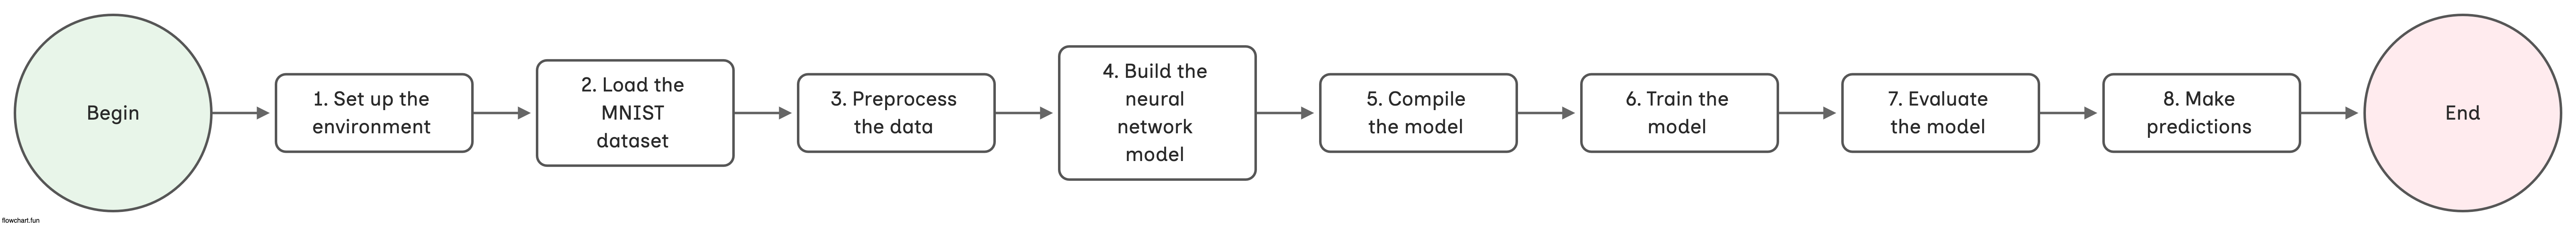

    
    1. Set up the environment
    2. Load the MNIST dataset
    3. Preprocess the data
    4. Build the neural network model
    5. Compile the model
    6. Train the model
    7. Evaluate the model
    8. Make predictions

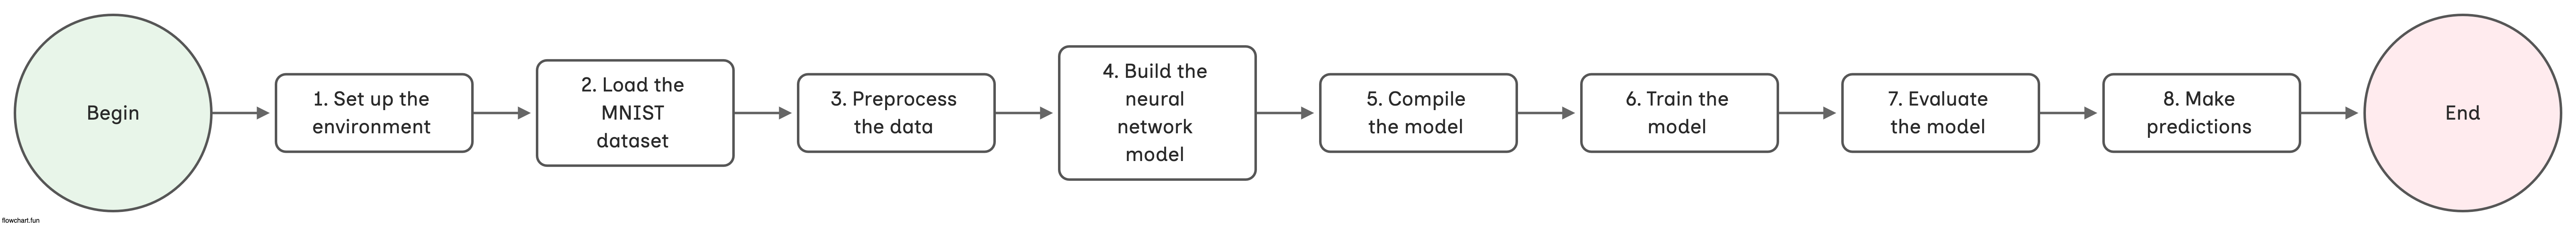

#### **Step 1: Set Up the Environment**
Before you start coding, make sure you have Python and the necessary libraries installed.

1. Install Python (if you haven't yet): Install Python 3.6 or higher. 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2. Install Keras and TensorFlow:

In [3]:
pip install tensorflow # Keras is included as part of TensorFlow (version 2.0 and above). So you don’t need to install Keras separately.

Note: you may need to restart the kernel to use updated packages.


3. Verify Installation: You can verify that Keras is installed correctly by importing it in a Python script or Jupyter notebook:

In [4]:
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")

tensorflow version: 2.16.1


#### **Step 2: Load the MNIST Dataset**
Keras provides easy access to the MNIST dataset. We can load it directly from the library.

In [5]:
from tensorflow.keras.datasets import mnist

print(f"MNIST dataset: {mnist}")

MNIST dataset: <module 'keras.api.datasets.mnist' from '/opt/conda/lib/python3.10/site-packages/keras/api/datasets/mnist/__init__.py'>


In [6]:
# import tensorflow as tf
# from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shape of the data to understand its structure
print(f"Training data shape: {x_train.shape}")
print(f"Training data Sample: {x_train[0]}")
print(f"Test data shape: {x_test.shape}")
print(f"Test data sample: {x_test[0]}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training data Sample: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 2

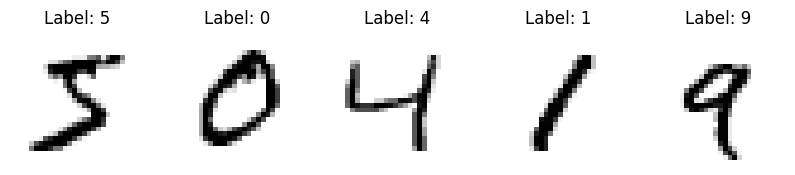

In [7]:
def display_images(x_train, y_train):
    # DISPLAY 5 smaple MNIST IMAGES 
    import matplotlib.pyplot as plt
    
    
    # Display the first 5 images from the training set
    plt.figure(figsize=(10, 4))
    for i in range(5):
        plt.subplot(1, 5, i+1)  # Create a grid of 1 row and 5 columns
        plt.imshow(x_train[i], cmap=plt.cm.binary)  # Use binary colormap for grayscale
        plt.title(f"Label: {y_train[i]}")  # Display the label (digit)
        plt.axis('off')  # Hide axis ticks
    
    plt.show()


display_images(x_train, y_train)

>- x_train: Training images (28x28 pixels, grayscale).
>- y_train: Labels for the training images (digit class 0-9).
>- x_test: Testing images (28x28 pixels, grayscale).
>- y_test: Labels for the testing images (digit class 0-9).

#### **Step 3: Preprocess the Data**

1. **Normalize the images**: Neural networks generally work better when input values are in a small range, like [0, 1]. MNIST images are in the range [0, 255], so we’ll normalize them by dividing by 255.

2. **One-hot encode the labels**: The labels are integers (0–9), but we need them in a one-hot encoded format for classification.

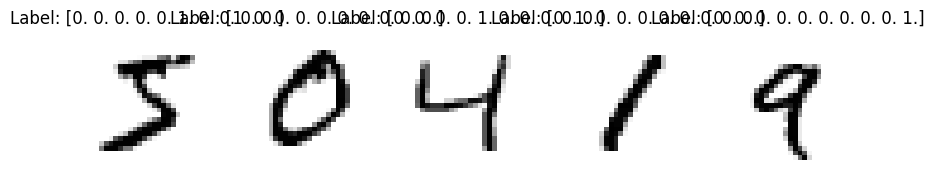

In [8]:
# Normalize the images with 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Hot-encoding 
y_train = tf.keras.utils.to_categorical(y_train, 10) # classifies all the labels into 10 catagories
y_test = tf.keras.utils.to_categorical(y_test, 10)

display_images(x_train, y_train)


In [9]:
# Check the shape of the labels
print(f"One-hot encoded y_train shape: {y_train.shape}")

One-hot encoded y_train shape: (60000, 10)


-------
> **Now that the data is prepared, we can start building the model using Keras.** 
------
#### Step 4: Build the Neural Network Model


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Build a Sequential model
model = Sequential()

# Add a Flatten layer to convert 2D images (28x28) into 1D vectors (784)
model.add(Flatten(input_shape=(28, 28)))

# Add a Dense layer (fully connected layer) with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Add the output layer with 10 neurons (one for each digit) and softmax activation
model.add(Dense(10, activation='softmax'))

# Print the model summary to check its structure
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

* Flatten: Converts the 28x28 image into a flat vector of 784 features. (28 * 28 = 784)
* Dense: Fully connected layers.
* ReLU: Rectified Linear Unit activation function.
* Softmax: Used for multi-class classification (output probability distribution over 10 classes).


#### **Step 5: Compile the Model**
Before training the model, we need to compile it. This involves specifying the optimizer, loss function, and metrics.

In [11]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


* **adam**: Optimizer used for training.
* **categorical_crossentropy**: Loss function for multi-class classification.
* **accuracy**: Evaluation metric to track model performance.

#### Step 6: Train the Model
Now it’s time to train the model using the training data.


In [13]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
print(f"Fitted model info: {model.summary()} ")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0334 - val_accuracy: 0.9749 - val_loss: 0.0779
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9921 - loss: 0.0268 - val_accuracy: 0.9749 - val_loss: 0.0858
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9926 - loss: 0.0228 - val_accuracy: 0.9789 - val_loss: 0.0754
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9944 - loss: 0.0178 - val_accuracy: 0.9804 - val_loss: 0.0752
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9958 - loss: 0.0139 - val_accuracy: 0.9799 - val_loss: 0.0773


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

Fitted model info: None 


* `epochs=5`: Train the model for 5 epochs.
* `batch_size=32`: Use batches of 32 samples for each gradient update.
* `validation_data`: Evaluate the model on the test set after each epoch.


#### Step 7: Evaluate the Model
Once the model is trained, we can evaluate it on the test data to see how well it performs.



In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

313/313 - 0s - 1ms/step - accuracy: 0.9799 - loss: 0.0773
Test loss: 0.07727755606174469
Test accuracy: 0.9799000024795532


#### Step 8: Make Predictions
The trained model to make predictions on new, unseen data.

In [18]:
predictions = model.predict(x_test)

# Show the predicted label for the first test image
print(f"Predicted label for first test image: {predictions[0].argmax()}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted label for first test image: 7


predictions is a 2D array of shape (num_samples, 10), where each row contains the predicted probability distribution across the 10 classes. 
The argmax() function gives the index of the class with the highest probability.



#### Visualize the Results

To get a better understanding of how the model is performing, you can visualize some of the test images alongside their predicted labels.


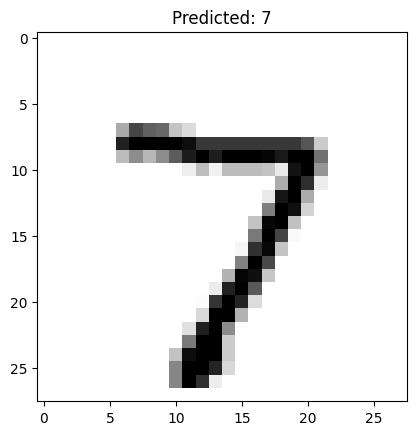

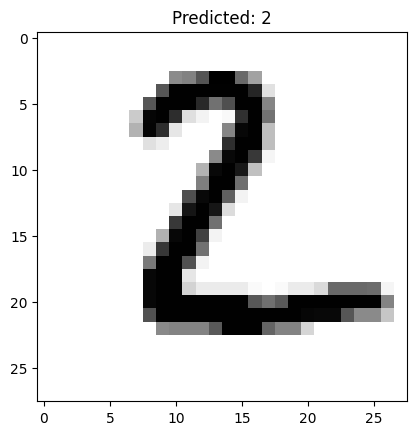

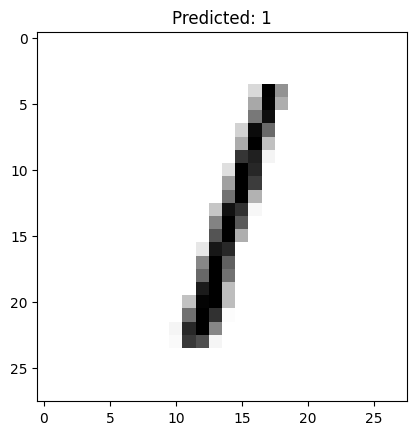

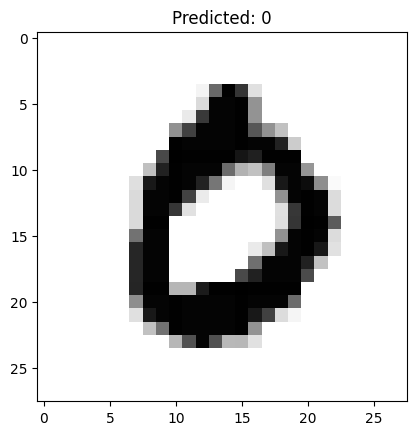

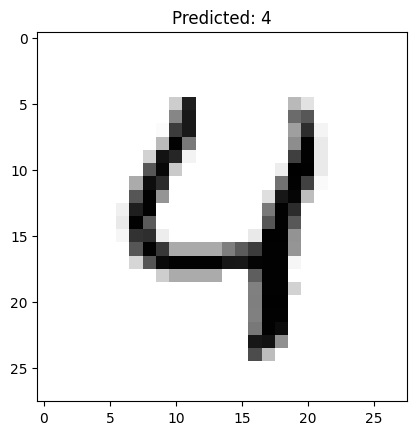

In [23]:
import matplotlib.pyplot as plt

# Show first 5 test images with their predicted labels
for idx in range(5):
    plt.imshow(x_test[idx], cmap=plt.cm.binary)
    plt.title(f"Predicted: {predictions[idx].argmax()}")
    plt.show()

### RECAP

1. Set up your environment and install TensorFlow/Keras.
2. Load and preprocess the MNIST dataset.
3. Build a simple neural network model.
4. Compile and train the model.
5. Evaluate the model's performance.
6. Make predictions on new data.
7. visualize the results.

\
This is a great starting point for working with Keras. You can take this as a template for building more complex models or applying it to different datasets. Let me know if you need any help with specific steps or want to explore more advanced topics!

### WHAT NEXT ?

* **Improve the model**: You can try adding more layers or changing the architecture, such as adding a convolutional layer (CNN) for better performance on image data.
* **Tune hyperparameters**: Experiment with different optimizers, learning rates, or batch sizes.
* **Use callbacks**: Add early stopping or model checkpoints to prevent overfitting or save the best model during training.